# Maryam Hosseinali 610398209

## part A - (Q2) - I. How many reads are in the fastq file?

In [1]:
filename = "SRR8185316.fastq" 

with open(filename, 'r') as file:
    number_of_lines = sum(1 for line in file)

number_of_reads = number_of_lines // 4 
print(f"Total number of reads: {number_of_reads}")


Total number of reads: 409268


## part A - (Q2) - II. Print the identifier, quality, and sequence of the first read of the fastq file.

In [3]:
filename = "SRR8185316.fastq"

with open(filename, 'r') as file:
    identifier = next(file).strip()
    sequence = next(file).strip()
    next(file)  # Skip the separator line
    quality = next(file).strip()

    print(f"Identifier: {identifier}")
    print(f"Sequence: {sequence}")
    print(f"Quality: {quality}")


Identifier: @SRR8185316.1 ERR022075.10741970 length=100
Sequence: AGCGGTACACATTATGGGTCTGCTCTCCGCAGGCGGCGTACACAGCCACGAAGATCACATCATGGCGATGGTAGAACTGGCAGCTGAACGCGGCGCAGAA
Quality: IIGIIIIIIIIIIIIHIIIIIIIIIIIIIIIII@IHHEHIIIIIIIIIIIHIIHIIIIIIIIGIHIIHFIIEIIGIHHGH@BE3BB>@>>2?@8?>?A@1


## Part A - (Q2) - III. How many times does the TTAAATGGAA subsequence appear in the file?

In [5]:
filename = "SRR8185316.fastq"
subsequence = "TTAAATGGAA"
count = 0

with open(filename, 'r') as file:
    for line_number, line in enumerate(file):
        if (line_number - 1) % 4 == 0:  # selecting sequence lines
            count += line.count(subsequence)

print(f"subsequence '{subsequence}' appears {count} times in the file.")

subsequence 'TTAAATGGAA' appears 23 times in the file.


## Part A- (Q2)  IV. Extract the first 1000 sequences of the fastq files (4000 lines).

In [1]:
filename = "SRR8185316.fastq"
output = "first_1000_sequences.fastq"

with open(filename, 'r') as file:
    with open(output, 'w') as outfile:
        for _ in range(1000 * 4):  
            line = next(file)
            outfile.write(line)


In [2]:
!pip install biopython matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:010m
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/92/1a/cd3e0c90d1a763ad90073e13b189b4702f11becf4e71dbbad70a7a149811/matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/b6/ab/5b893944b1602a366893559bfb227fdfb3ad7c7629b2a80d039bb5924367/numpy-1.26.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.2 MB/s eta 0:00:001.3 MB/s eta 0:00:01
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e2/83/29a63bbc

In [4]:
!pip install biopython matplotlib seaborn


## Part A - (Q2) - V. Plot the quality of the reads in the fastq file using a box plot.

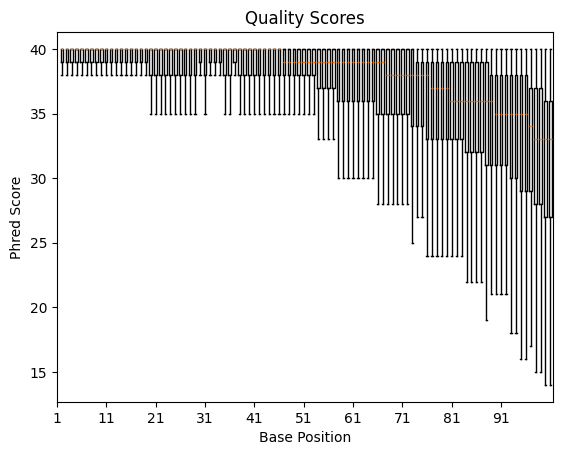

In [1]:
import matplotlib.pyplot as plt

filename = "SRR8185316.fastq"

# Store the quality scores.
all_qualities = []

# Read the first 100,000 reads from the file
with open(filename, 'r') as file:
    for _ in range(100000):
        
        # Skip non-quality lines.
        file.readline()  
        file.readline()  
        file.readline()  
        
        # Read the quality line for the current read.
        quality = file.readline().strip()
        
        # Convert ASCII characters in the quality string to Phred scores (Phred+33 encoding) and store them.
        phred_scores = [ord(char) - 33 for char in quality]
        all_qualities.append(phred_scores)
        
# Rearrange the list of quality scores for having one list for each base position
# Transpose scores for plotting.
transposed_qualities = list(map(list, zip(*all_qualities)))

# Create a box plot of the quality scores.
plt.boxplot(transposed_qualities, showfliers=False)
plt.title('Quality Scores')
plt.xlabel('Base Position')
plt.ylabel('Phred Score')

# Set the x-axis labels to show specific intervals
plt.xticks(ticks=range(0, len(transposed_qualities), 10), labels=range(1, len(transposed_qualities) + 1, 10))

# Display the plot.
plt.show()


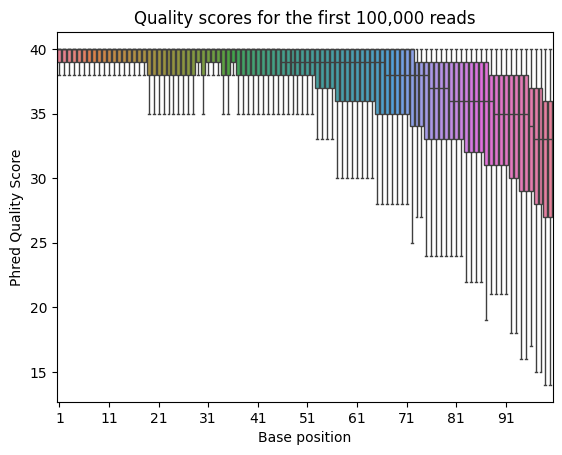

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


filename = "SRR8185316.fastq"
all_qualities = []


with open(filename, 'r') as file:
    while len(all_qualities) < 100000:
         # Skip non-quality lines.
        identifier = next(file).strip() 
        sequence = next(file).strip()   
        plus = next(file).strip()     
        
        quality = next(file).strip()     # Read quality string

        # Convert ASCII characters in the quality string to Phred quality scores
        quality_scores = [ord(char) - 33 for char in quality]
        all_qualities.append(quality_scores)

# Transpose the list of lists
transposed_qualities = list(map(list, zip(*all_qualities)))


sns.boxplot(data=transposed_qualities, showfliers=False) 
plt.title('Quality scores for the first 100,000 reads')
plt.xlabel('Base position')
plt.ylabel('Phred Quality Score')
plt.xticks(ticks=range(0, len(transposed_qualities), 10), labels=range(1, len(transposed_qualities) + 1, 10))

plt.show()


## Part A - (Q2)- VI. Show the distribution of read lengths using a density plot.

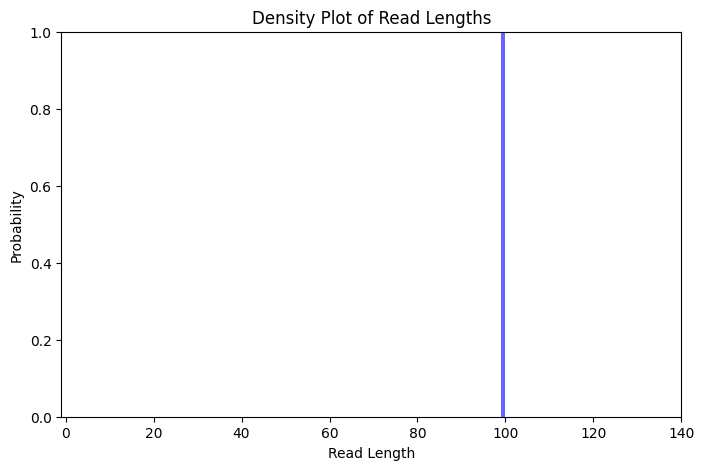

In [6]:
import matplotlib.pyplot as plt


filename = "SRR8185316.fastq"

# a list to hold the lengths of each read
read_lengths = []

with open(filename, 'r') as file:
    while True:
        line = file.readline()
        # If the line is empty, we've reached the end of the file
        if not line:
            break
            
        # If the line starts with '@', it's the start of a new read
        if line.startswith('@'):
            
            # Reading the sequence line
            sequence = file.readline().strip()
            
            # Adding the length of the sequence to our list
            read_lengths.append(len(sequence))
            file.readline()  # Skip '+'
            file.readline()  # Skip quality line


plt.figure(figsize=(8, 5))
plt.hist(read_lengths, bins=range(min(read_lengths), max(read_lengths) + 1), density=True, alpha=0.6, color='b')


plt.title('Density Plot of Read Lengths')
plt.xlabel('Read Length')
plt.ylabel('Probability')

plt.xlim(min(read_lengths) - 1, max(read_lengths) + 40)
plt.ylim(0, 1)
plt.grid(True)
plt.show()
